## Assignment Week 4 - Biswajit Sharma

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.metrics import PredictionErrorDisplay

Load the data as a Pandas data frame and ensure that it imported correctly.

In [2]:
# read dataset
df = pd.read_csv("./datasets/auto-mpg.csv")

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Remove the car name column

In [4]:
# drop car name column
df = df.drop(columns=["car name"])

In [5]:
# view few rows to check car name column is dropped
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


The horsepower column values likely imported as a string data type. Figure out why and replace any strings with the column mean

In [6]:
# check information of the dataframe columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


yes, we see that `horsepower` column has datatype object or string. This might be because the column having non numeric value/s.

In [7]:
# Lets check if we have any non numeric data using isnumeric function
df[df["horsepower"].str.isnumeric() == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,?,2046,19.0,71,1
126,21.0,6,200.0,?,2875,17.0,74,1
330,40.9,4,85.0,?,1835,17.3,80,2
336,23.6,4,140.0,?,2905,14.3,80,1
354,34.5,4,100.0,?,2320,15.8,81,2
374,23.0,4,151.0,?,3035,20.5,82,1


We see theres are `non-numeric` string data in the `horsepower` column.

In [8]:
# replace non-numeric with NaN
df["horsepower"] = df["horsepower"].apply(lambda x: int(x) if x.isnumeric() else np.nan)

In [9]:
# replace Nan in horsepower column with  mean value
mean_horsepower = df["horsepower"].mean(skipna=True)
df["horsepower"] = df["horsepower"].fillna(mean_horsepower)

In [10]:
# check if horsepower column is converted to numeric datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


Create dummy variables for the origin column.

In [11]:
# using pandas get_dummies function to create dummy variables for origin column
df_with_dummies = pd.get_dummies(df, columns=["origin"], prefix="origin", dtype="int")

In [12]:
# view few rows after transformations
df_with_dummies.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0


Create a correlation coefficient matrix and/or visualization. Are there features highly correlated with mpg?

In [13]:
# create correlation matrix for numerical features
corr_df = df_with_dummies.corr()
corr_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,-0.568192,0.259022,0.442174
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,0.604351,-0.352861,-0.396479
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,0.651407,-0.373886,-0.433505
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,0.486083,-0.281258,-0.321325
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,0.598398,-0.298843,-0.440817
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,-0.250806,0.204473,0.109144
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,-0.139883,-0.024489,0.193101
origin_1,-0.568192,0.604351,0.651407,0.486083,0.598398,-0.250806,-0.139883,1.000000,-0.597198,-0.643317
origin_2,0.259022,-0.352861,-0.373886,-0.281258,-0.298843,0.204473,-0.024489,-0.597198,1.000000,-0.229895
origin_3,0.442174,-0.396479,-0.433505,-0.321325,-0.440817,0.109144,0.193101,-0.643317,-0.229895,1.000000


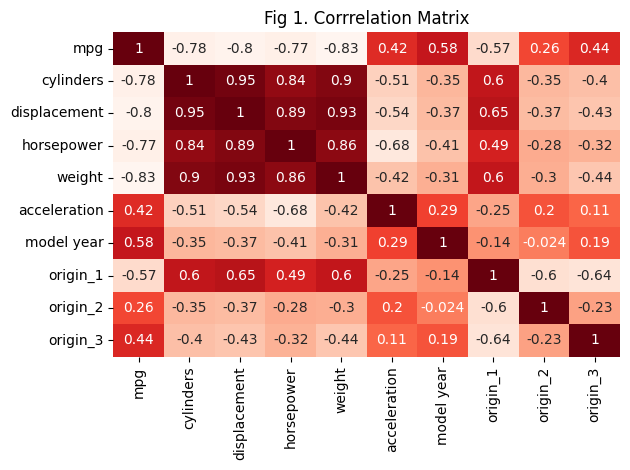

In [14]:
# create correlation matrix heatmap visualization
sns.heatmap(corr_df, annot=True, cmap="Reds", cbar=False)
plt.title("Fig 1. Corrrelation Matrix")
plt.tight_layout()
plt.show()

Yes, there are features highly correlated with `mpg`. Given below a list of such highly correlated featues (correlation coefficient > 0.7)
 
 - `cylinders`
 - `displacement`
 - `horsepower`
 - `weight`

Plot mpg versus weight. Analyze this graph and explain how it relates to the corresponding correlation coefficient.

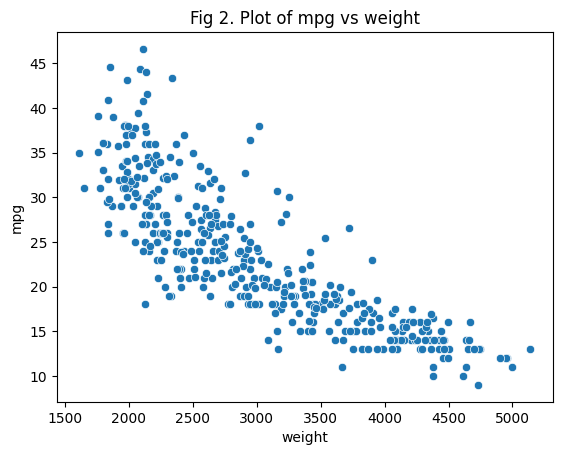

In [15]:
# create a plot of mpg vs weight
sns.scatterplot(data=df_with_dummies,x="weight",y="mpg")
plt.title("Fig 2. Plot of mpg vs weight")
plt.show()

The scatterplot shows **high negative correlation** between `mpg` and `weight`. This observation is consisent with the _correlation coefficient_ of $-0.83$ which we noticed in the above correlation matrix (Fig 1). Therefore, as weight increases mpg tends to decrease.

Randomly split the data into 80% training data and 20% test data, where your target is mpg.

In [16]:
# generate feature column names from the datafarme
#for linear regression it is also better to drop one of the dummy coded feature variables as to avoid linear dependence
features_columns = [cols for cols in df_with_dummies.columns if cols not in ["mpg","origin_3"]]
target_column = "mpg"

In [17]:
# using sklearn's train_test_split method to split the dataset
features_train, features_test, target_train, target_test = train_test_split(
    df_with_dummies[features_columns], df_with_dummies[target_column], test_size=0.2, random_state=0
)

Train an ordinary linear regression on the training data.

In [56]:
# displacement column has high correlation with weight and cyclinders (>0.9) and may cause linear dependence in the model
# hence, lets drop the displacement column
features_train = features_train.drop(columns=["displacement"])
features_test = features_test.drop(columns=["displacement"])

In [57]:
# create a standardscaler as linear regression coefficients may depends on scale of the features
stdscaler = StandardScaler()

In [58]:
#create linear regression object
linear_reg = LinearRegression()

In [59]:
# create  pipeline to perform scaling and fit linear regression model
pipe = Pipeline([('scaler', stdscaler), ('reg', linear_reg)])

In [60]:
#fit training data
pipe.fit(features_train, target_train)

Pipeline(steps=[('scaler', StandardScaler()), ('reg', LinearRegression())])

In [61]:
# get predicted values for train and test set
predicted_target_train = pipe.predict(features_train)
predicted_target_test = pipe.predict(features_test)

In [62]:
# calculate R squared
print(f"Training R2: {r2_score(target_train, predicted_target_train)}")
print(f"Test R2: {r2_score(target_test, predicted_target_test)}")

Training R2: 0.8165031334079649
Test R2: 0.823677352835743


In [63]:
# claulate RMSE 
print(f"Training RMSE: {root_mean_squared_error(target_train, predicted_target_train)}")
print(f"Test RMSE: {root_mean_squared_error(target_test, predicted_target_test)}")

Training RMSE: 3.325940894445471
Test RMSE: 3.34499212885396


In [64]:
# calcuate MAE 
print(f"Training MAE: {mean_absolute_error(target_train, predicted_target_train)}")
print(f"Test MAE: {mean_absolute_error(target_test, predicted_target_test)}")

Training MAE: 2.49305863200574
Test MAE: 2.708943559550754


In [28]:
# range of target variale
df_with_dummies["mpg"].min(), df_with_dummies["mpg"].max()

(9.0, 46.6)

##### Interpretation of \$R^2$, RMSE and MAE

**$R^2$** for the _test_ set is $0.82$, which shows that the model can account for $82$% of the _variance_ in the target (mpg). This looks like a good fit from $R^2$ perspective. However, we also need to check _residual plots_ because high $R^2$ value does not always necessarily mean a good fit. 

**RMSE** and **MAE** show that on an average, the predicted values for `mpg` column are within $2$ to $3$ mpg of the actual value. The range of `mpg` (target) variable is $9$ to $46$. For a higher fuel efficiency scenario, the error looks _acceptable_ as $2$ to $3$ mpg difference will not be much of a problem, but for a lower fuel efficiency scenario (such as less than $15$), $2$ to $3$ mpg seems to be a _substantial error_. 

We also observed that _training scores_ and _test scores_ are almost similar. Therfeore, we can say that the _ordinary regression model_ is performing fairly well with unseen data. However, other methods of model evaluation such as cross-validation with multiple folds of train-test sets are needed to better ascertain the performance of the model on unseen data.

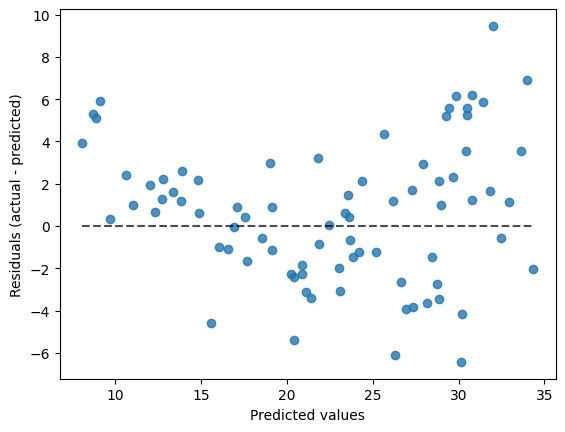

In [29]:
# generate residual plot of linear regression model
display = PredictionErrorDisplay(y_true=target_test,y_pred=predicted_target_test)
display.plot()
plt.show()

The _residual plot_ shows that the residuals are mostly random around the _zero_ line for higher predicted mpg values. However, for predicted values less than $15$ mpg, we see that the residuals are not randomly distributed, but tend to lie between 1 and 6 mpg. Therefore we can say that the model is a fair fit with room for improvement, probably by adding more feature variables to the model (such as polynomial features) to account for any non-linear relationship.

Pick another regression model and repeat the previous two steps. Note: Do NOT choose logistic regression as it is more like a classification model.

In [30]:
# import Ridge regression
from sklearn.linear_model import Ridge

In [31]:
# create a pipeline to perform standard scaling and fit Ridge regression model
ridge_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("ridgereg", Ridge(alpha=10))
    ])

In [32]:
# fit training data
ridge_pipe.fit(features_train, target_train)

Pipeline(steps=[('scaler', StandardScaler()), ('ridgereg', Ridge(alpha=10))])

In [33]:
# get predicted values using trained Ridge model
ridge_train_predicted = ridge_pipe.predict(features_train)
ridge_test_predicted = ridge_pipe.predict(features_test)

In [34]:
# claculate R2 
print(f"Training R2: {r2_score(target_train, ridge_train_predicted)}")
print(f"Test R2: {r2_score(target_test, ridge_test_predicted)}")

Training R2: 0.8146169960652224
Test R2: 0.8175331725560466


In [35]:
# calculate RMSE 
print(f"Training RMSE: {root_mean_squared_error(target_train, ridge_train_predicted)}")
print(f"Test RMSE: {root_mean_squared_error(target_test, ridge_test_predicted)}")

Training RMSE: 3.342990622542033
Test RMSE: 3.4027732651722826


In [36]:
# calculate MAE 
print(f"Training MAE: {mean_absolute_error(target_train, ridge_train_predicted)}")
print(f"Test MAE: {mean_absolute_error(target_test, ridge_test_predicted)}")

Training MAE: 2.4903918044892976
Test MAE: 2.7185461370798616


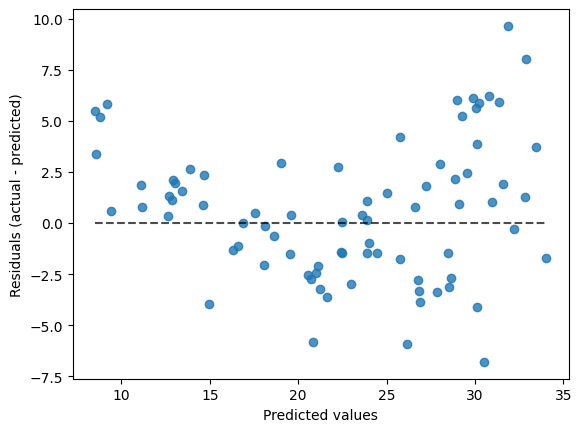

In [37]:
# generate residual plot of Ridge regression model
display = PredictionErrorDisplay(y_true=target_test,y_pred=ridge_test_predicted)
display.plot()
plt.show()

We do not notice any significant difference in **$R^2$**, **RMSE** and **MAE** when using the _Ridge_ model. $R^2$ for the _test_ set is $0.81$, which shows that the model can account for $81$% of the _variance_ in the target (mpg) same as the _ordinary linear regression_ model.
The residual plot also shows the same observation as _ordinary linear regression_ model. It is mostly random around the _zero line_ except for predicted values less than $15$ mpg.  Therefore, we can say that the _ridge_ model is a fair fit with the potential for improvement of the model, may be by including polynomial features to account for any non-linear relationships.